In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path='/content/drive/MyDrive/Datasets/my_data.csv'
# Read dataset and DataFrame
df=pd.read_csv(path)
print(df.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [3]:
df["Life expectancy "].loc[df['Country']=="India"]

,Life expectancy
1186,68.3
1187,68.0
1188,67.6
1189,67.3
1190,66.8
1191,66.4
1192,66.0
1193,65.5
1194,65.2
1195,64.8


In [4]:
# Features metadata
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# DataFrame shape
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 2938
Number of columns: 22


In [6]:
# DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [8]:
# Statistical info for Numerical Features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [9]:
cols=df.select_dtypes(include=['float64','int64']).columns
print(cols)

for i in cols:
  print(i,df[i].value_counts())
  print('---------------------------------------')

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Year Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
---------------------------------------
Life expectancy  Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
83.4     1
83.2     1
48.8     1
43.8     1
45.4     1
Name: count, Length: 362, dtype: int64
---------------------------------------
Adult Mortality Adult Mortality
12.0     34
14.0     30
16.0     29
138.0    25
11.0     25
         ..
71

In [10]:
# Exploring Categorical Features
df['Country'].value_counts()

,count
Country,
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
...,...
Monaco,1
Marshall Islands,1
Saint Kitts and Nevis,1


In [11]:
df['Status'].value_counts()

,count
Status,
Developing,2426
Developed,512


In [12]:
# Cleaning the data
# 1) Handling the missing values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [13]:
# As the number of Missing Values is large I will use Imputing Method to fill null values with mean value
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)

df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])


In [14]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [15]:
# Handling outliers
# First i will draw boxplot for each column
import plotly.express as px
for column in df.columns:
  fig=px.box(df,y=column,title=f'Box plot for {column}')

  # Update layout to center the title and make it bold
  fig.update_layout(
      title=dict(text=f'<b>Box Plot for {column}</b>',x=0.5),
      boxmode='group'
  )

  fig.show()

In [16]:
# dealing with outliers

cols_to_handle_outliers=[
     'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Perform outlier handling for each specified columns
for col_name in cols_to_handle_outliers:
  # Calculate quartiles and IQR
  q1=df[col_name].quantile(0.25)
  q3=df[col_name].quantile(0.75)
  iqr=q3-q1

  # Define the lower and the upper bounds for the outliers
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr

  # Replace outliers with the mean value of the column
  df[col_name]=np.where((df[col_name]>upper_bound) | (df[col_name]<lower_bound),np.mean(df[column]),df[col_name])

In [17]:
# I will draw the boxplot again to check outliers after handling it
for cols in df.columns:
  fig=px.box(df,y=column,title=f'Box Plot for {cols}')

  fig.update_layout(
      title=dict(text=f'<b>Box Plot for {cols}</b>',x=0.5),
      boxmode='group'
  )
  fig.show()

In [18]:
# Now much better
# Data visualization

fig=px.histogram(df,x="Year",color="Year",title="Count Plot for Year")

# Update layout to center the title make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Year</>',x=0.5)
)

fig.show()


In [19]:
# using plotly draw line plot to show the trend of life expectancy over the years
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',title='Trend of Life Expectancy Over the Years')

# Update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>',x=0.5)
)

fig.show()

In [20]:
# using plotly draw count plot for df['Status'] and color each bar with different color
fig=px.histogram(df,x='Status',color='Status',title='Count Plot for Status of Country')

# update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Status of Country</b>',x=0.5)
)
fig.show()

In [21]:
numeric_columns=df.select_dtypes(include=['int64','float64']).columns

# Create a correlation matrix for selected numeric columns
correlation_matrix=df[numeric_columns].corr()

# Plot heatmap using Plotly Express
fig=px.imshow(correlation_matrix,
              labels=dict(x='Columns',y='Columns',color='Correlation'),
              x=correlation_matrix.columns,
              y=correlation_matrix.columns,
              color_continuous_scale='blues',
              title='Heatmap: Correlation Matrix of Numeric columns')

fig.update_layout(title_text='<b> Heatmap: Correlation Matrix of Numeric columns </b>',title_x=0.5,width=1200,height=1200)
fig.show()

In [22]:
# Data Preprocessing
# Handling categorical features (encoding)
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
cols_to_encode=['Country','Status']

# Apply label encoding to X
for col in cols_to_encode:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [23]:
df['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [24]:
df['Status'].unique()

array([1, 0])

In [25]:
# splitting features from target
X=df.drop('Life expectancy ',axis=1)
y=df['Life expectancy ']

In [26]:
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.000000,11.992793,0.01,71.279624,65.000000,11.992793,19.1,...,11.992793,8.16,65.0,0.100000,584.259210,1.199279e+01,11.992793,11.992793,0.479,10.1
1,0,2014,1,271.000000,11.992793,0.01,73.523582,62.000000,492.000000,18.6,...,58.000000,8.18,62.0,0.100000,612.696514,3.275820e+05,11.992793,11.992793,0.476,10.0
2,0,2013,1,268.000000,11.992793,0.01,73.219243,64.000000,430.000000,18.1,...,62.000000,8.13,64.0,0.100000,631.744976,1.199279e+01,11.992793,11.992793,0.470,9.9
3,0,2012,1,272.000000,11.992793,0.01,78.184215,67.000000,11.992793,17.6,...,67.000000,8.52,67.0,0.100000,669.959000,3.696958e+06,11.992793,11.992793,0.463,9.8
4,0,2011,1,275.000000,11.992793,0.01,7.097109,68.000000,11.992793,17.2,...,68.000000,7.87,68.0,0.100000,63.537231,2.978599e+06,11.992793,11.992793,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,11.992793,27.000000,4.36,0.000000,68.000000,31.000000,27.1,...,67.000000,7.13,65.0,11.992793,454.366654,1.277751e+07,9.400000,9.400000,0.407,9.2
2934,192,2003,1,11.992793,26.000000,4.06,0.000000,11.992793,11.992793,26.7,...,11.992793,6.52,68.0,11.992793,453.351155,1.263390e+07,9.800000,9.900000,0.418,9.5
2935,192,2002,1,73.000000,25.000000,4.43,0.000000,73.000000,304.000000,26.3,...,73.000000,6.53,71.0,11.992793,57.348340,1.255250e+05,1.200000,1.300000,0.427,10.0
2936,192,2001,1,11.992793,25.000000,1.72,0.000000,76.000000,529.000000,25.9,...,76.000000,6.16,75.0,11.992793,548.587312,1.236616e+07,1.600000,1.700000,0.427,9.8


In [27]:
# Columns to scale
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler=MinMaxScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])

In [28]:
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,1.000000,1,0.578366,0.218051,0.000000,0.065265,0.609228,0.013340,0.209733,...,0.000000,0.670235,0.609228,0.0,0.032752,0.000000,0.782421,0.772259,0.019251,0.360000
1,0.0,0.933333,1,0.596026,0.218051,0.000000,0.067320,0.574748,0.547275,0.203940,...,0.528775,0.671956,0.574748,0.0,0.034350,0.010490,0.782421,0.772259,0.018995,0.353333
2,0.0,0.866667,1,0.589404,0.218051,0.000000,0.067041,0.597734,0.478309,0.198146,...,0.574748,0.667654,0.597734,0.0,0.035421,0.000000,0.782421,0.772259,0.018484,0.346667
3,0.0,0.800000,1,0.598234,0.218051,0.000000,0.071587,0.632214,0.013340,0.192352,...,0.632214,0.701208,0.632214,0.0,0.037570,0.118394,0.782421,0.772259,0.017888,0.340000
4,0.0,0.733333,1,0.604857,0.218051,0.000000,0.006498,0.643708,0.013340,0.187717,...,0.643708,0.645284,0.643708,0.0,0.003477,0.095388,0.782421,0.772259,0.017121,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,0.266667,1,0.024267,0.490909,0.262523,0.000000,0.643708,0.034483,0.302433,...,0.632214,0.581616,0.609228,1.0,0.025449,0.409196,0.611842,0.603896,0.013118,0.300000
2934,1.0,0.200000,1,0.024267,0.472727,0.244418,0.000000,0.000000,0.013340,0.297798,...,0.000000,0.529133,0.643708,1.0,0.025392,0.404597,0.638158,0.636364,0.014055,0.320000
2935,1.0,0.133333,1,0.158940,0.454545,0.266747,0.000000,0.701174,0.338154,0.293163,...,0.701174,0.529993,0.678188,1.0,0.003130,0.004020,0.072368,0.077922,0.014821,0.353333
2936,1.0,0.066667,1,0.024267,0.454545,0.103199,0.000000,0.735654,0.588432,0.288528,...,0.735654,0.498159,0.724161,1.0,0.030746,0.396023,0.098684,0.103896,0.014821,0.340000


In [29]:
# Splitting data into trian test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [30]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 21)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 21)
Shape of Y_test is: (588,)


In [31]:
# Building ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([
    Dense(64,activation='relu',input_dim=21),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [32]:
model.compile(optimizer='adam',loss='mean_squared_error',
              metrics=['mean_absolute_error','mean_squared_error'])

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,793 (38.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 0 (0.00 B)

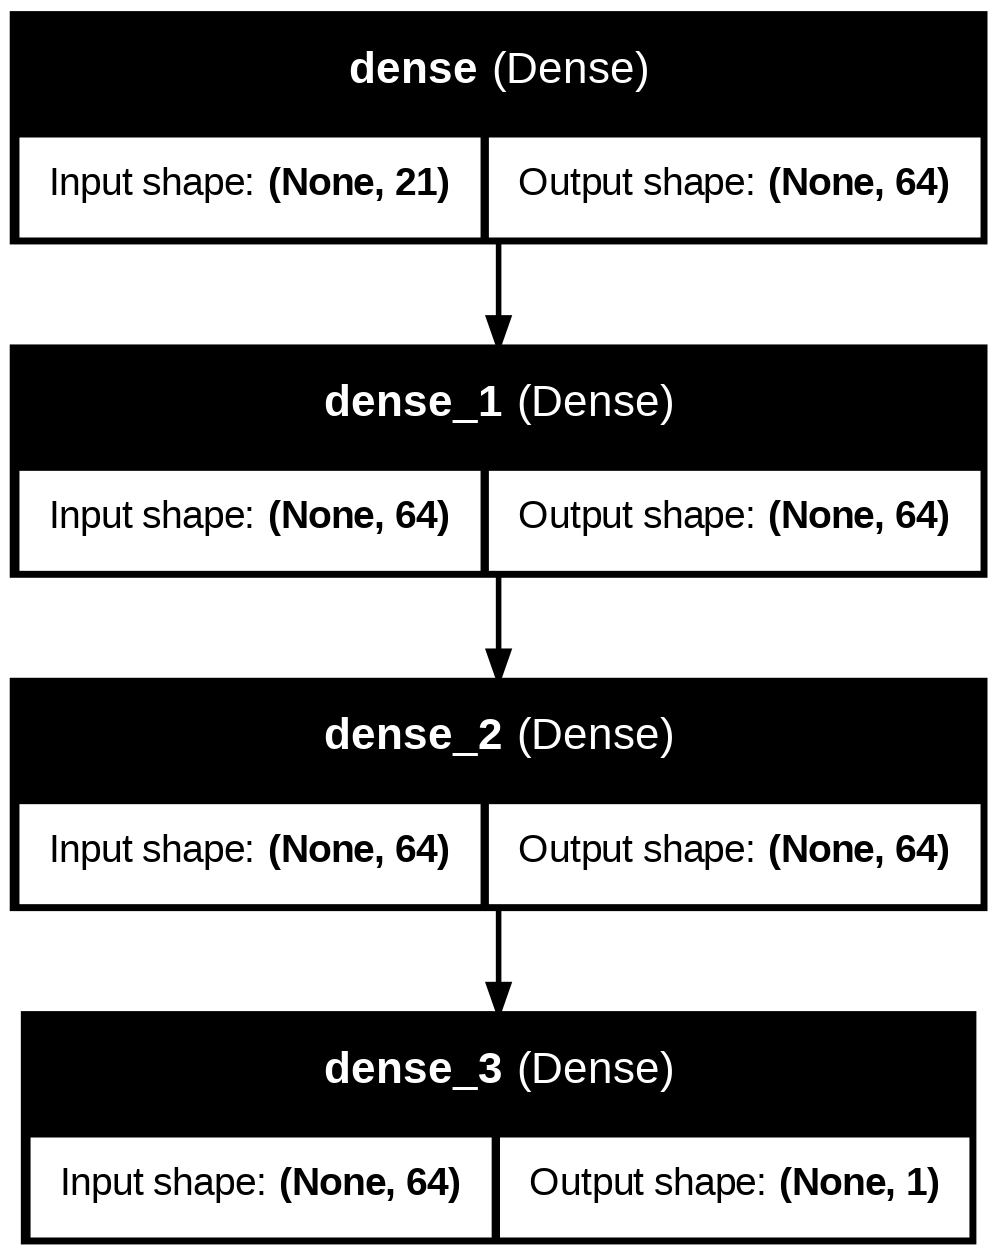

In [35]:
# Plot the model
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [36]:
# Model Fitting
history=model.fit(X_train,y_train,epochs=150,validation_split=0.2)

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 4415.9932 - mean_absolute_error: 65.4848 - mean_squared_error: 4415.9932 - val_loss: 418.1295 - val_mean_absolute_error: 17.6535 - val_mean_squared_error: 418.1295
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 244.4557 - mean_absolute_error: 12.5210 - mean_squared_error: 244.4557 - val_loss: 115.5572 - val_mean_absolute_error: 8.6710 - val_mean_squared_error: 115.5572
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 102.3396 - mean_absolute_error: 7.9938 - mean_squared_error: 102.3396 - val_loss: 82.2681 - val_mean_absolute_error: 7.1600 - val_mean_squared_error: 82.2681
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 77.2701 - mean_absolute_error: 6.9076 - mean_squared_error: 77.2701 - val_loss: 62.1078 - val_mean_absolute_error: 6.1681 - val_mean_squared_error: 62.1078
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.8332 - mean_absolute_error: 6.2658 - mean_squared_error: 63.83

In [42]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])


In [43]:
for key,value in history.history.items():
  print(f'{key}:{value}')

loss:[3575.92236328125, 193.29554748535156, 96.80630493164062, 72.2000503540039, 55.75210952758789, 44.08163070678711, 36.014034271240234, 30.443252563476562, 26.619070053100586, 23.75081443786621, 21.346445083618164, 19.977916717529297, 19.5576171875, 17.906007766723633, 17.216487884521484, 17.047863006591797, 16.47917938232422, 15.9601469039917, 15.773208618164062, 15.223572731018066, 14.448844909667969, 14.987979888916016, 14.120515823364258, 13.819620132446289, 13.567781448364258, 13.436455726623535, 13.066751480102539, 12.720508575439453, 12.414864540100098, 12.049470901489258, 12.082847595214844, 12.149099349975586, 11.51716423034668, 10.953279495239258, 11.036458015441895, 10.795379638671875, 10.678576469421387, 10.978325843811035, 10.232635498046875, 9.75137996673584, 10.016905784606934, 9.46555233001709, 9.716879844665527, 9.623958587646484, 8.810219764709473, 8.953399658203125, 8.916461944580078, 8.227925300598145, 8.096128463745117, 8.488348007202148, 7.982827186584473, 7.94

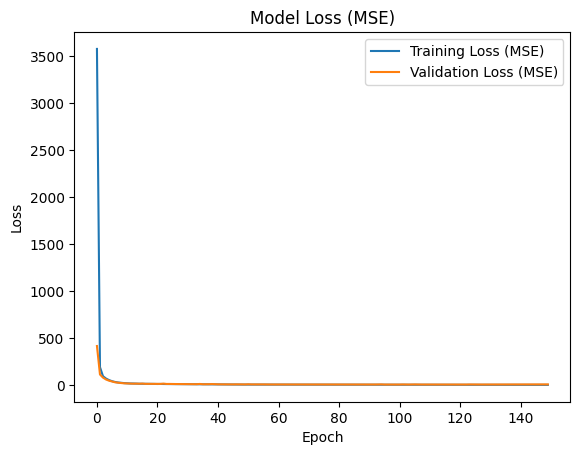

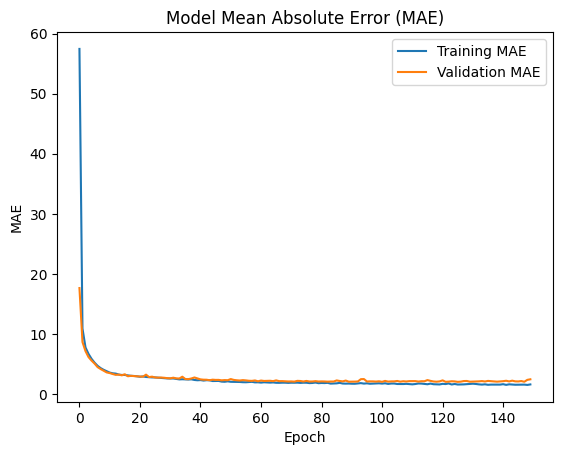

In [44]:
import matplotlib.pyplot as plt

# Training vs Validation loss (MSE)
plt.plot(history.history['loss'],label='Training Loss (MSE)')
plt.plot(history.history['val_loss'],label='Validation Loss (MSE)')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Training vs Validation MAE
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [45]:
# Prediction
y_pred=model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [47]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
print("R2 Score=",R2)

R2 Score= 0.8921767777755456


In [48]:
# Model score is 89% !!
model.save("Life_Expectancy.keras")

import joblib
joblib.dump(scaler,"scaler.pkl")
joblib.dump(encoder,"encoder.pkl")

['encoder.pkl']